**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the Dataset**

In [ ]:
df = pd.read_csv("AB_NYC_2019.csv")

**Data Inspection**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [ ]:
df.shape

(29203, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29203 non-null  int64  
 1   name                            29187 non-null  object 
 2   host_id                         29202 non-null  float64
 3   host_name                       29184 non-null  object 
 4   neighbourhood_group             29202 non-null  object 
 5   neighbourhood                   29202 non-null  object 
 6   latitude                        29202 non-null  float64
 7   longitude                       29202 non-null  float64
 8   room_type                       29202 non-null  object 
 9   price                           29202 non-null  float64
 10  minimum_nights                  29202 non-null  float64
 11  number_of_reviews               29202 non-null  float64
 12  last_review                     

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,1
host_name,19
neighbourhood_group,1
neighbourhood,1
latitude,1
longitude,1
room_type,1
price,1


**Handling the Missing Values**

1. Replacing with Unknown

In [9]:
df['name'].fillna("unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)

2. Replacing with Median

In [17]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

/tmp/ipython-input-230575574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)


3. Handle Nulls carefully

In [11]:
df['last_review'] = pd.to_datetime(df['last_review'])

Recheck the Nulls

In [12]:
df.isnull().sum()

,0
id,0
name,0
host_id,1
host_name,0
neighbourhood_group,1
neighbourhood,1
latitude,1
longitude,1
room_type,1
price,1


**Data Type Conversion**

In [16]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')

**Outliers Detection**

In [21]:
df['price'].dtype

dtype('float64')

In [22]:
df['price'].isnull().sum()

np.int64(1)

In [23]:
price_data = df['price'].dropna()

In [19]:
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].quantile(0.75)
IQR = Q2 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q2 + 1.5 * IQR

Visualize Outliers

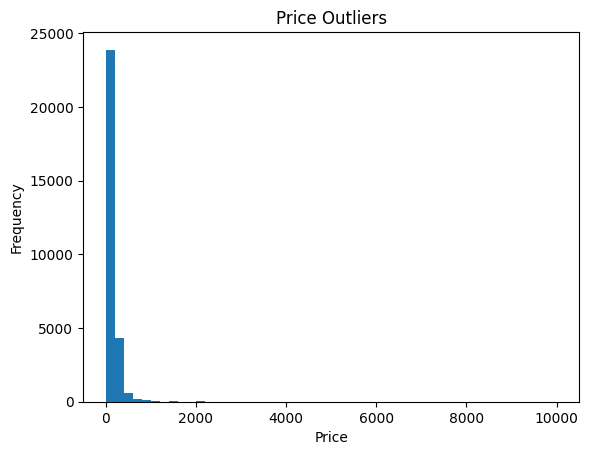

In [25]:
plt.figure()
plt.hist(price_data, bins=50)
plt.title("Price Outliers")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Outlier Treatment**

In [26]:
df['price'] = np.where(df['price'] > upper_limit, upper_limit,
np.where(df['price'] < lower_limit, lower_limit, df['price']))

In [27]:
Q1 = df['minimum_nights'].quantile(0.25)
Q2 = df['minimum_nights'].quantile(0.75)
IQR = Q2 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q2 + 1.5 * IQR

In [28]:
df['minimum_nights'] = np.where(df['minimum_nights'] > upper_limit, upper_limit,
np.where(df['minimum_nights'] < lower_limit, lower_limit, df['minimum_nights']))

**Final Dataset Check**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              29203 non-null  int64         
 1   name                            29203 non-null  object        
 2   host_id                         29202 non-null  float64       
 3   host_name                       29203 non-null  object        
 4   neighbourhood_group             29202 non-null  object        
 5   neighbourhood                   29202 non-null  object        
 6   latitude                        29202 non-null  float64       
 7   longitude                       29202 non-null  float64       
 8   room_type                       29202 non-null  object        
 9   price                           29202 non-null  float64       
 10  minimum_nights                  29202 non-null  float64       
 11  nu

In [30]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.920300e+04,2.920200e+04,29202.000000,29202.000000,29202.000000,29202.000000,29202.000000,24373,29203.000000,29202.000000,29202.000000
mean,1.141531e+07,3.418226e+07,40.729139,-73.954652,130.568215,3.662660,32.499418,2018-06-04 20:14:46.817379584,0.917019,3.543250,99.267242
min,2.539000e+03,2.571000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,5.371022e+06,4.843862e+06,40.689350,-73.982610,70.000000,2.000000,1.000000,2017-08-20 00:00:00,0.150000,1.000000,0.000000
50%,1.152941e+07,1.812999e+07,40.722750,-73.956745,109.000000,3.000000,8.000000,2019-01-04 00:00:00,0.400000,1.000000,8.000000
75%,1.760850e+07,4.805519e+07,40.763847,-73.939863,174.000000,5.000000,40.000000,2019-06-18 00:00:00,1.110000,2.000000,201.000000
max,2.240994e+07,1.640484e+08,40.911690,-73.712990,330.000000,9.500000,629.000000,2019-07-08 00:00:00,19.750000,232.000000,365.000000
std,6.882951e+06,4.006633e+07,0.053707,0.041836,78.980658,2.838986,54.200405,NaN,1.289977,12.108883,130.122810


In [31]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,0.40,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,9.5,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29198,22409377,Cosy room in bushwick,100032033.0,Shaul,Brooklyn,Bushwick,40.68684,-73.91001,Private room,35.0,1.0,0.0,NaT,0.40,1.0,0.0
29199,22409383,Park Slope 15 min to MANHATTAN SLEEPS 10 + INFANT,3532263.0,Alejandro,Brooklyn,Gowanus,40.67023,-73.99235,Entire home/apt,330.0,2.0,19.0,2019-06-21,1.03,4.0,363.0
29200,22409448,Premier Garden Suite near Columbia University,9470468.0,Zeleke,Manhattan,Harlem,40.80815,-73.95399,Entire home/apt,120.0,3.0,20.0,2019-07-05,4.96,1.0,55.0
29201,22409676,Great little spot,164048400.0,Jarryd,Brooklyn,Bushwick,40.70167,-73.93075,Private room,40.0,1.0,1.0,2017-12-30,0.05,1.0,0.0


In [32]:
import os
os.makedirs("cleaned", exist_ok=True)

In [34]:
df.to_csv("cleaned/AB_NYC_2019_cleaned.csv", index=False)

In [35]:
cleaned_df = pd.read_csv("cleaned/AB_NYC_2019_cleaned.csv")
cleaned_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,0.40,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,9.5,9.0,2018-11-19,0.10,1.0,0.0


**Documentation**

📌 Dataset Used

NYC Airbnb Open Data (2019)

This dataset contained missing values, inconsistent data types, and extreme outliers, making it suitable for a real-world data cleaning challenge.

1️⃣ Handling Missing Values

🔹 Problem Identified

Several columns contained missing (null) values:

name

host_name

reviews_per_month

last_review

🔹 Actions Taken & Reasons

a) Text Columns (name, host_name)

Action: Replaced null values with "Unknown"

Reason: Text data cannot be averaged or interpolated. Using a placeholder preserves data structure without affecting analysis.

b) Numeric Column (reviews_per_month)

Action: Replaced missing values with the median

Reason: Median is robust to outliers and better represents central tendency in skewed data.

c) Date Column (last_review)

Action: Converted column to datetime format

Reason: Datetime format allows proper time-based analysis. Missing values were left as NaT, which is acceptable for date fields.

2️⃣ Data Type Conversion

🔹 Problem Identified

Some numerical columns were stored as object (string) types:

price

minimum_nights

availability_365

🔹 Action Taken

Converted these columns to numeric format using pd.to_numeric()

Invalid entries were coerced into NaN

🔹 Reason

Correct data types are essential for:

Statistical analysis

Visualization

Machine learning models

3️⃣ Outlier Detection

🔹 Problem Identified

Columns such as:

price

minimum_nights

contained extreme values that could distort analysis.

🔹 Action Taken

Used the Interquartile Range (IQR) method to identify outliers

Visualized distributions using boxplots

During visualization, null values caused empty plots. Hence, null values were temporarily removed only for plotting purposes.

🔹 Reason

IQR is a robust statistical technique that identifies extreme values without being affected by skewed distributions.

4️⃣ Outlier Treatment

🔹 Action Taken

Applied capping technique to limit values within acceptable upper and lower bounds

🔹 Reason

Prevents loss of data

Reduces the impact of extreme values

Maintains dataset size and integrity

5️⃣ Final Dataset Validation

After cleaning:

No unnecessary missing values remained

All columns had appropriate data types

Extreme outliers were controlled

The dataset is now clean, consistent, and ready for analysis or modeling.